(333, 9)
              precision    recall  f1-score   support

           0       1.00      0.63      0.77       111
           1       0.59      1.00      0.75        60

    accuracy                           0.76       171
   macro avg       0.80      0.82      0.76       171
weighted avg       0.86      0.76      0.76       171

(333, 9)
              precision    recall  f1-score   support

           0       1.00      0.60      0.75       111
           1       0.58      1.00      0.73        60

    accuracy                           0.74       171
   macro avg       0.79      0.80      0.74       171
weighted avg       0.85      0.74      0.75       171

(333, 9)
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       111
           1       0.67      1.00      0.80        60

    accuracy                           0.82       171
   macro avg       0.83      0.86      0.82       171
weighted avg       0.88      0.82      0.83    

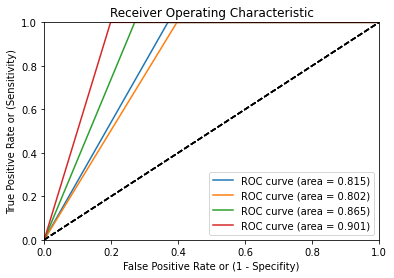

In [89]:
import numpy as np
import scipy.io as sp
from sklearn.semi_supervised import LabelPropagation,LabelSpreading
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, roc_auc_score,precision_score
from sklearn.model_selection import StratifiedKFold 
from sklearn import svm
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KernelDensity
from sklearn import metrics
import matplotlib.pyplot as plt
# evaluate label propagation on the semi-supervised learning dataset



dataSet = sp.loadmat('breastw.mat')
X = dataSet['X']
y = dataSet['y']
skf = StratifiedKFold(n_splits=4,shuffle=False)

for train_index, test_index in skf.split(X,y):
    i=0
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_SemiS = np.array([])
    
    
    y_train = np.array([-1 if label == 1 else 1 for label in y_train])
    X_train_SemiS =np.empty(shape =[0,9])
   
 
  
    for j in y_train :
        if i==len(y_train):
            break
        if y_train[i]== 1 :
            resh = np.reshape(X_train[i,:],[1,9])
            y_train_SemiS = np.append(y_train_SemiS,y_train[i],)
            X_train_SemiS = np.append(X_train_SemiS,resh,axis = 0)
            i=i+1
            
           
           
        else :
            i = i+1
    
    print(np.shape(X_train_SemiS))
    modelSemiS = GaussianMixture(n_components=2)
    modelSemiS.fit(X_train_SemiS,y_train_SemiS)
    y_pred = modelSemiS.predict(X_test)
    if precision_score(y_test,y_pred)< 0.15:
    
         y_pred = np.array([0 if label == 1 else 1 for label in y_pred])
    
    
    print (classification_report(y_test,y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

        

